In [21]:
import pandas as pd
import pulp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pulp import *

/usr/local/lib/python3.5/dist-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [22]:
Dane = pd.DataFrame.from_csv('train.csv')
Dane

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


In [23]:
df = pd.read_csv('train.csv')

In [24]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8031,8031,59,retired,divorced,primary,no,-88,yes,no,unknown,5,jun,910,2,-1,0,unknown,yes
8032,8032,35,technician,divorced,secondary,no,5724,yes,no,unknown,30,may,691,10,-1,0,unknown,yes
8033,8033,32,blue-collar,married,secondary,no,759,yes,no,cellular,9,apr,317,5,-1,0,unknown,yes
8034,8034,50,management,married,tertiary,no,1612,no,no,cellular,15,jun,532,2,98,2,other,yes
8035,8035,33,management,single,tertiary,no,1150,yes,no,telephone,12,may,109,2,-1,0,unknown,no


<Figure size 432x288 with 0 Axes>

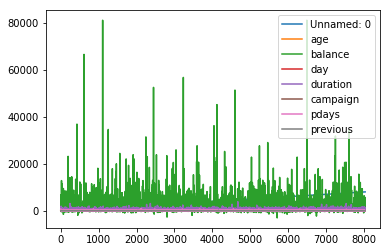

In [25]:
%matplotlib inline
plt.figure(); df.plot()

In [26]:
calosc=np.array(Dane)
X=calosc[:,:-1]
Y=calosc[:,-1]

In [27]:
Y

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


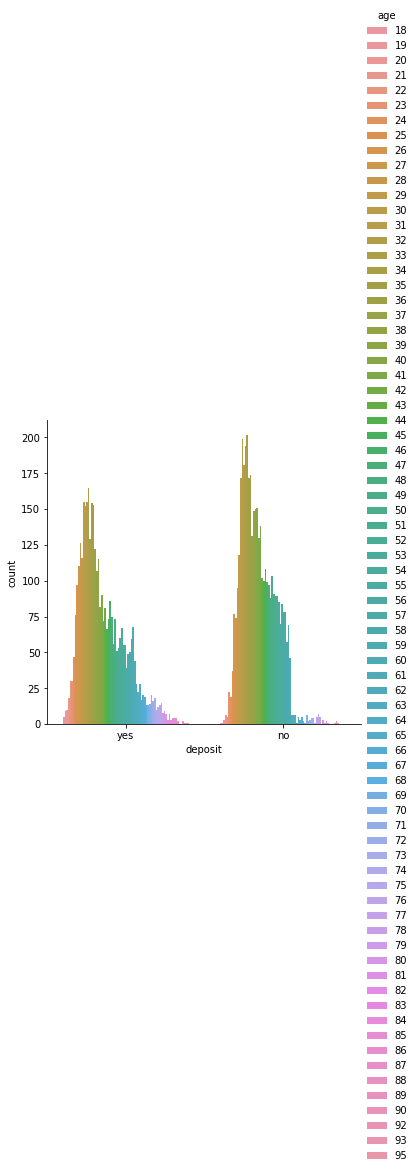

In [28]:
sns.factorplot('deposit', data=Dane,hue='age',kind='count')

In [29]:
prace = pd.read_csv("train.csv", index_col=2)
prace.head()                                                                                                                                                                                                              

,Unnamed: 0,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
job,,,,,,,,,,,,,,,,,
services,0,60,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
student,1,25,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
services,2,38,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
management,3,40,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
technician,4,39,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no


In [45]:
cat_columns = ['marital','age','poutcome','loan'] ##,'education'
train_processed = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)

In [46]:
train_processed

,Unnamed: 0,job,education,default,balance,housing,contact,day,month,duration,...,age_90,age_92,age_93,age_95,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,loan_no,loan_yes
0,0,services,tertiary,no,4256,yes,cellular,16,aug,239,...,0,0,0,0,0,1,0,0,1,0
1,1,student,secondary,no,154,no,cellular,3,mar,141,...,0,0,0,0,1,0,0,0,1,0
2,2,services,secondary,no,507,yes,cellular,17,apr,55,...,0,0,0,0,1,0,0,0,1,0
3,3,management,tertiary,no,1361,no,cellular,29,jan,1473,...,0,0,0,0,0,0,0,1,1,0
4,4,technician,secondary,no,834,yes,cellular,20,apr,390,...,0,0,0,0,0,0,0,1,0,1
5,5,management,tertiary,no,2987,yes,cellular,12,aug,307,...,0,0,0,0,0,0,0,1,1,0
6,6,entrepreneur,tertiary,no,1953,yes,unknown,6,jun,112,...,0,0,0,0,0,0,0,1,1,0
7,7,services,secondary,no,513,yes,cellular,29,jul,331,...,0,0,0,0,0,0,0,1,1,0
8,8,retired,primary,no,1495,no,telephone,25,jul,1946,...,0,0,0,0,0,0,0,1,1,0
9,9,management,tertiary,no,6836,yes,unknown,29,may,374,...,0,0,0,0,0,0,0,1,1,0


In [32]:
def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model


In [48]:
final_features = ["marital_divorced", "marital_married", "marital_single", "loan_no","loan_yes","poutcome_unknown","poutcome_success",
                 "poutcome_other","poutcome_failure","education_unknown","education_tertiary","education_secondary","education_primary","age_95","age_94"
                 ,"age_93","age_92","age_91","age_90","age_89","age_88","age_87","age_86","age_85","age_84","age_83","age_82","age_81","age_80",
                 "age_79","age_78","age_77","age_76","age_75","age_74","age_73","age_72","age_71","age_70","age_69","age_68","age_67",
                 "age_66","age_65","age_64","age_63","age_62","age_61","age_60","age_59","age_58","age_57","age_56","age_55","age_54",
                 "age_93","age_92","age_91","age_90","age_89","age_88","age_87","age_86","age_85","age_84","age_83","age_82","age_81"]
final_data = train_processed[["deposit"] + final_features]
training, testing = train_test_split(final_data, test_size = 0.3, random_state = 0, stratify = final_data["deposit"])
X_train = training[training.columns[1:]]
Y_train = training[training.columns[:1]]
X_test = testing[testing.columns[1:]]
Y_test = testing[testing.columns[:1]]

KeyError: "['education_unknown' 'education_tertiary' 'education_secondary'\n 'education_primary' 'age_94' 'age_91'] not in index"

In [35]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 7, min_samples_leaf = 10, random_state = 0)
forest_model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = 9, n_estimators = 300, random_state = 0)
gradboost_model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

In [36]:
tree_acc, my_tree = my_models(tree_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Decision Tree is", tree_acc)

forest_acc, my_forest = my_models(forest_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Random Forest is", forest_acc)

gradboost_acc, my_gradboost = my_models(gradboost_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Gradient Boosting is", gradboost_acc)

[ 0.          0.93412442  0.06587558]
0.555377777778
The accuracy of Decision Tree is 0.555785980921


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 0.04285932  0.49757563  0.45956505]
0.555377777778
The accuracy of Random Forest is 0.555785980921
[ 0.0316914   0.93412598  0.03418263]
0.555377777778
The accuracy of Gradient Boosting is 0.555785980921


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
final_test = train_processed[final_features]

tree_prediction = my_tree.predict(final_test)
forest_prediction = my_forest.predict(final_test)
gradboost_prediction = my_gradboost.predict(final_test)

test_cp1 = train_processed[:]
test_cp2 = train_processed[:]
test_cp3 = train_processed[:]

headers = ["job", "deposit"]

test_cp1["deposit"] = tree_prediction
tree_prediction = pd.DataFrame(test_cp1, columns = headers)
tree_prediction.to_csv("tree_prediction.csv", index = False)

test_cp2["deposit"] = forest_prediction
forest_prediction = pd.DataFrame(test_cp2, columns = headers)
forest_prediction.to_csv("forest_prediction.csv", index = False)

test_cp3["deposit"] = gradboost_prediction
gradboost_prediction = pd.DataFrame(test_cp3, columns = headers)
gradboost_prediction.to_csv("gradboost_prediction.csv", index = False)